In [1]:
import keras
import tensorflow as tf
import os
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from matplotlib import cm

2024-03-10 10:47:52.133870: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 10:47:52.330101: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 10:47:52.330148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 10:47:52.348722: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 10:47:52.387712: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 10:47:52.388110: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
#input data function
def load_input_data(input_file):
    with open(input_file, 'rb') as file:
        dataset = pickle.load(file)
        # For our problem we have positions and energy arrays,
        # which are respectively data and labels in common Machine Learning language
        positions_array = np.array([mol['positions'] for mol in dataset])
        energies_array = np.array([mol['energy'] for mol in dataset])

    return positions_array, energies_array

In [3]:
# axes creation
input_file = 'saved_dataset/dataset_O_HH_dH1_100_5a_test3.pickle' 
#input_file = 'saved_dataset/merged_O_HH_dataset_5a.pickle'
#input_file = 'saved_dataset/dataset_casuale_25_5a_20.pickle' 
positions, energies = load_input_data(input_file)

d1 = positions[:,0] #dH1>dH2
d2 = positions[:,1]
theta = positions[:,2]
#print(theta)
graphs_description = '-e_AIpcut_100_OHH_rdH.png'
#graphs names
graph1_name = 'd1'+ graphs_description
graph2_name = 'd2'+ graphs_description
graph3_name = 'theta'+ graphs_description
print(graph1_name)

d1-e_AIpcut_100_OHH_rdH.png


In [4]:
# Esempio di utilizzo del modello per fare previsioni
# Carica il modello salvato
#model = keras.models.load_model('saved_model/battleroyale_conorelu_5layers_5000epochs_512neurons_10k.keras')
model = keras.models.load_model('saved_model/Adadelta6_6layers_256neurons_35000epochs_128batchsize_0.001l2par.keras')
#model = keras.models.load_model('saved_model/top10_conorelu2_6layers_256neurons_10k.keras')
model.summary()
input_data = positions

tf.function(autograph=False, reduce_retracing=True)
# Effettua previsioni sulle nuove osservazioni
predictions = model.predict(input_data)
model_name = 'Adadelta6_6layers_256neurons_35000epochs_128batchsize_0.001l2par'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1024      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 44801 (175.00 KB)
Trainable params: 44801 

2024-03-10 10:47:56.352367: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1/1 [==============================] - 0s 104ms/step


4/4 [==============================] - 0s 870us/step


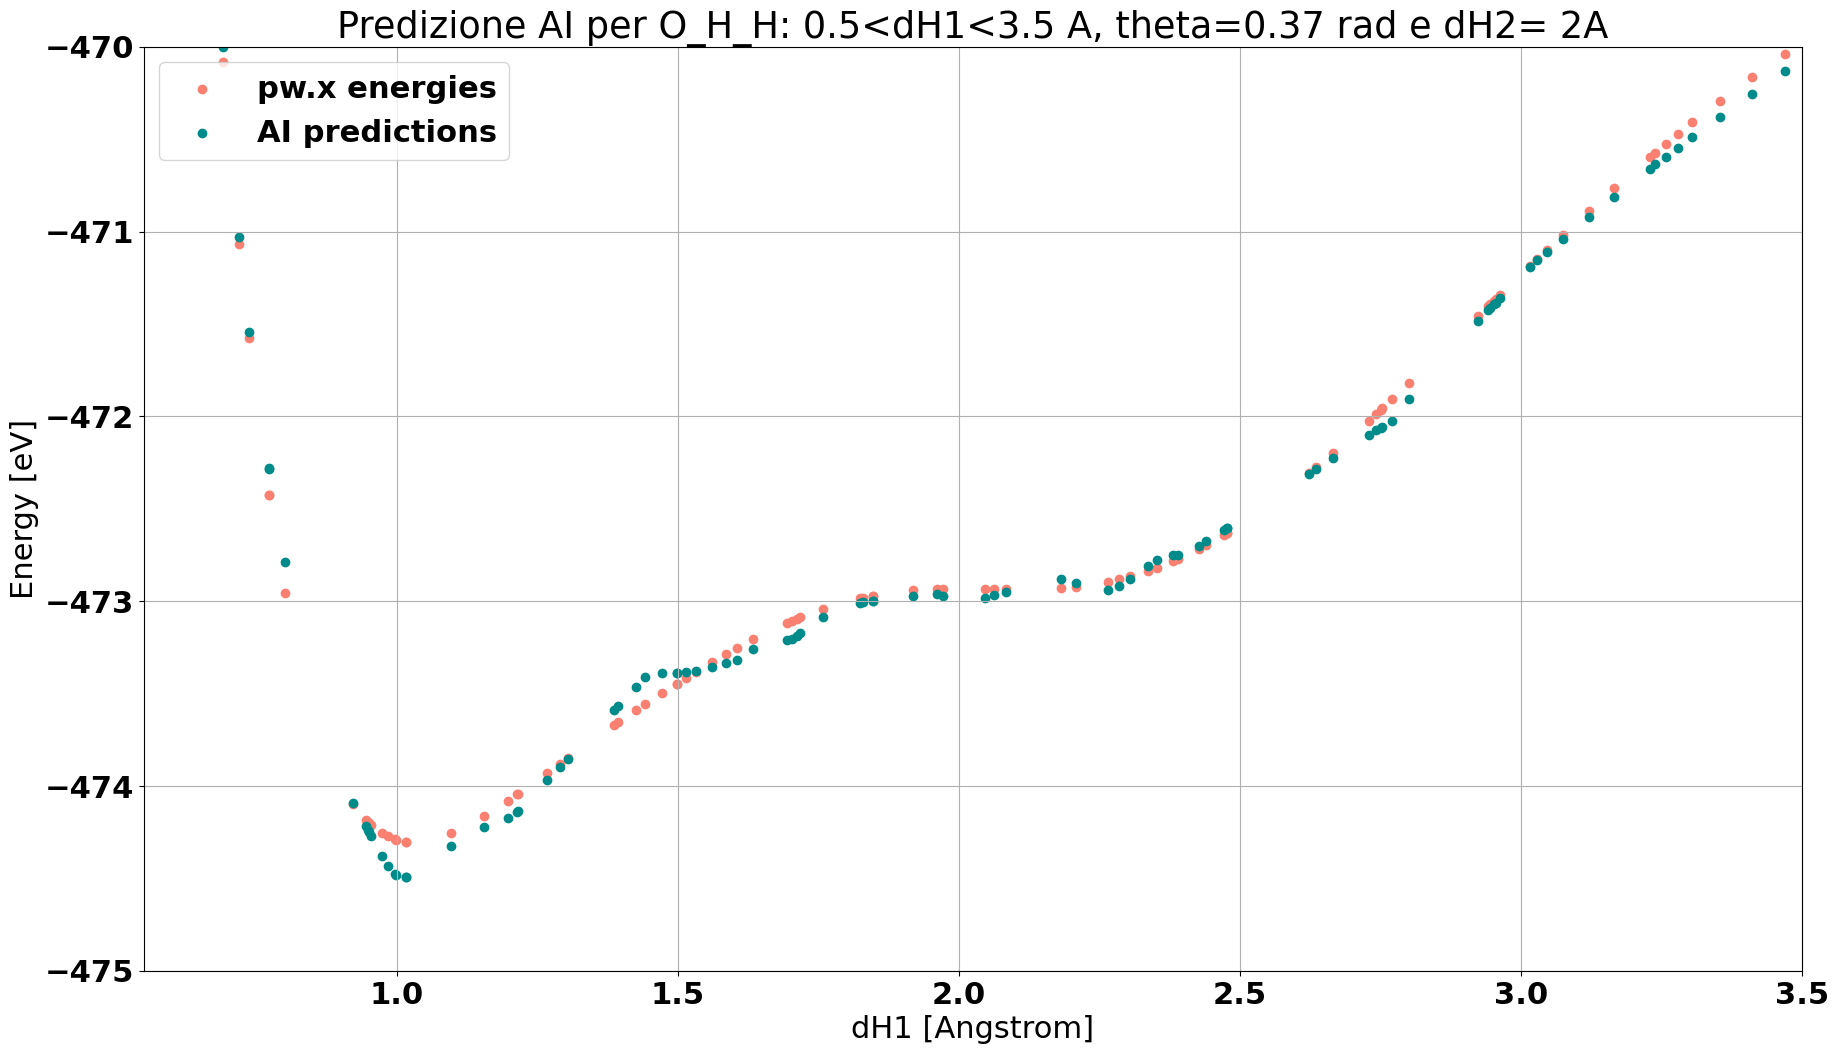

In [18]:
#setting bigger font to ease the eyes
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


#OH_rdH plot save
input_file5 = 'saved_dataset/dataset_O_H_H_100_5a_test.pickle' 

positions5, energies5 = load_input_data(input_file5)
d15 = positions5[:,0] #dH1>dH2
d25 = positions5[:,1]
theta5 = positions5[:,2]

input_data5 = positions5
    # Effettua previsioni sulle nuove osservazioni
predictions5 = model.predict(input_data5)

    # Creazione del grafico di OH_H
graph5_dir = os.path.join(os.getcwd(), 'model_graphs_OHH')
if not os.path.isdir(graph5_dir):
    os.makedirs(graph5_dir)
graph5_name = model_name + '__O_H_Hfit.png'
graph5_path = os.path.join(graph5_dir, graph5_name)
    
fig5, ax5 = plt.subplots(figsize=(21.4,12))
ax5.set(title='Predizione AI per O_H_H: 0.5<dH1<3.5 A, theta=0.37 rad e dH2= 2A')
ax5.set(xlabel="dH1 [Angstrom]", ylabel="Energy [eV]")
ax5.set(xlim=(0.55,3.5) ,ylim=(-475,-470))
ax5.scatter(d15, energies5, color ='salmon', label='pw.x energies')
ax5.scatter(d15, predictions5, color='darkcyan', label='AI predictions')
ax5.grid(axis='both')
ax5.legend(loc='best', ncol=1, facecolor= 'white')
fig5.savefig(graph5_path, dpi = 200)  

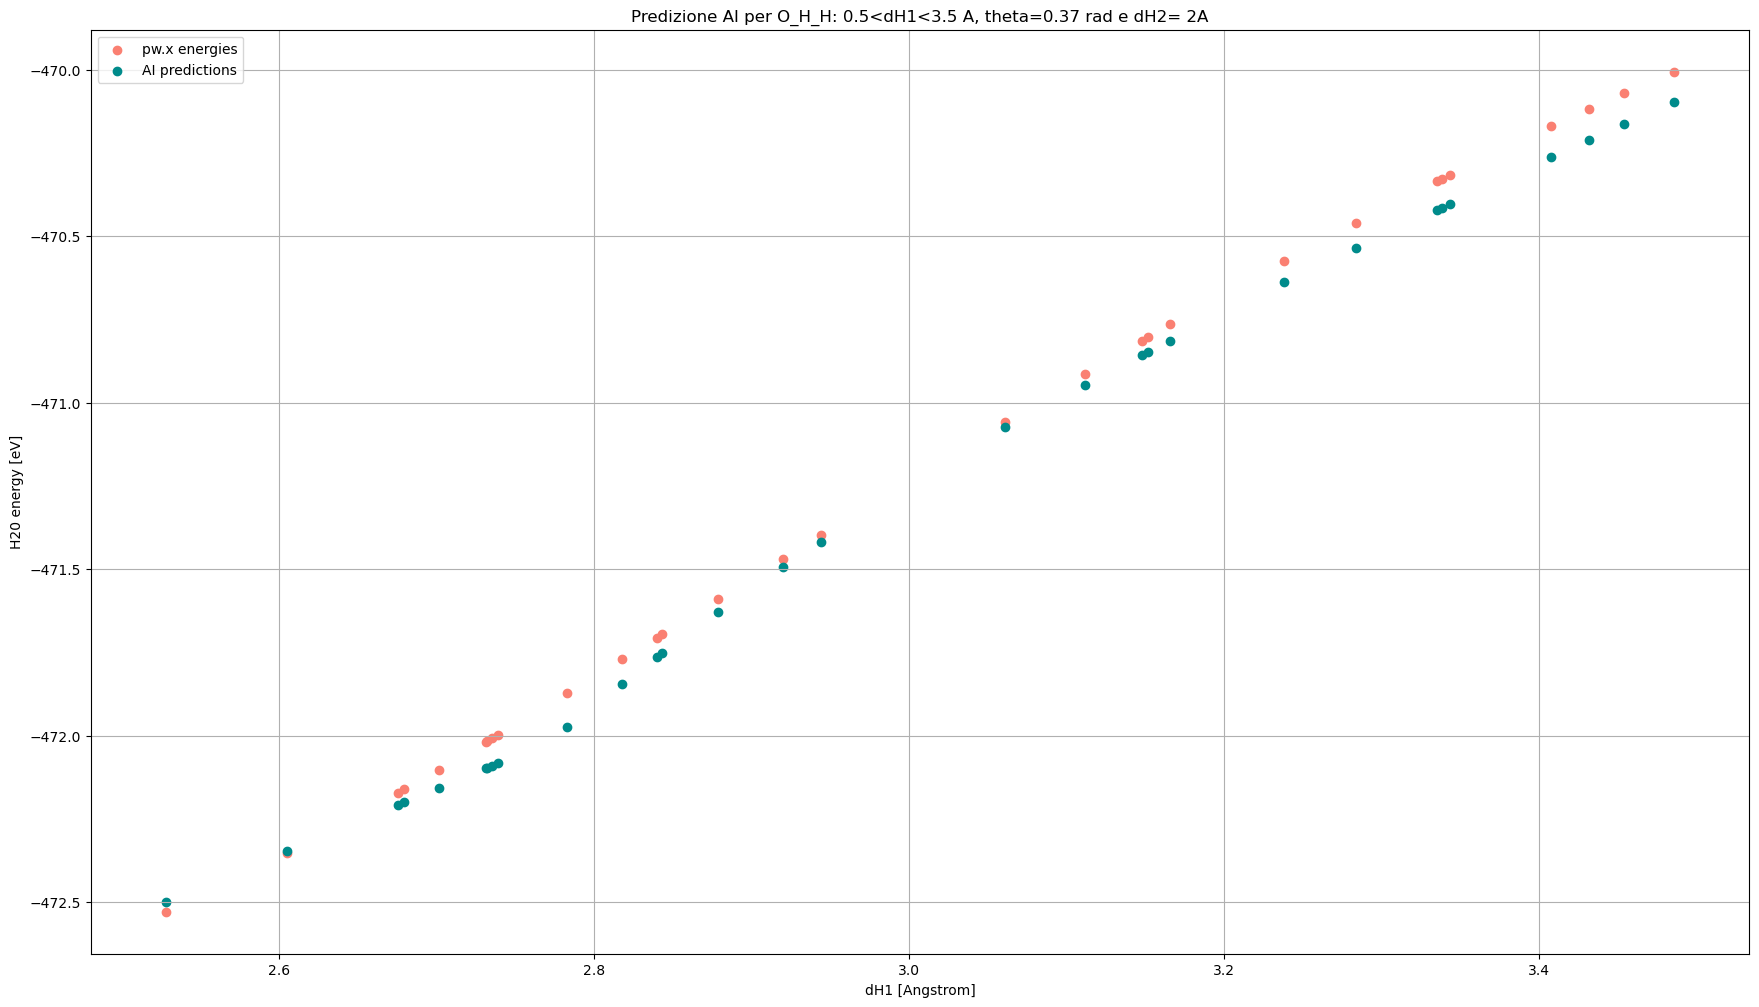

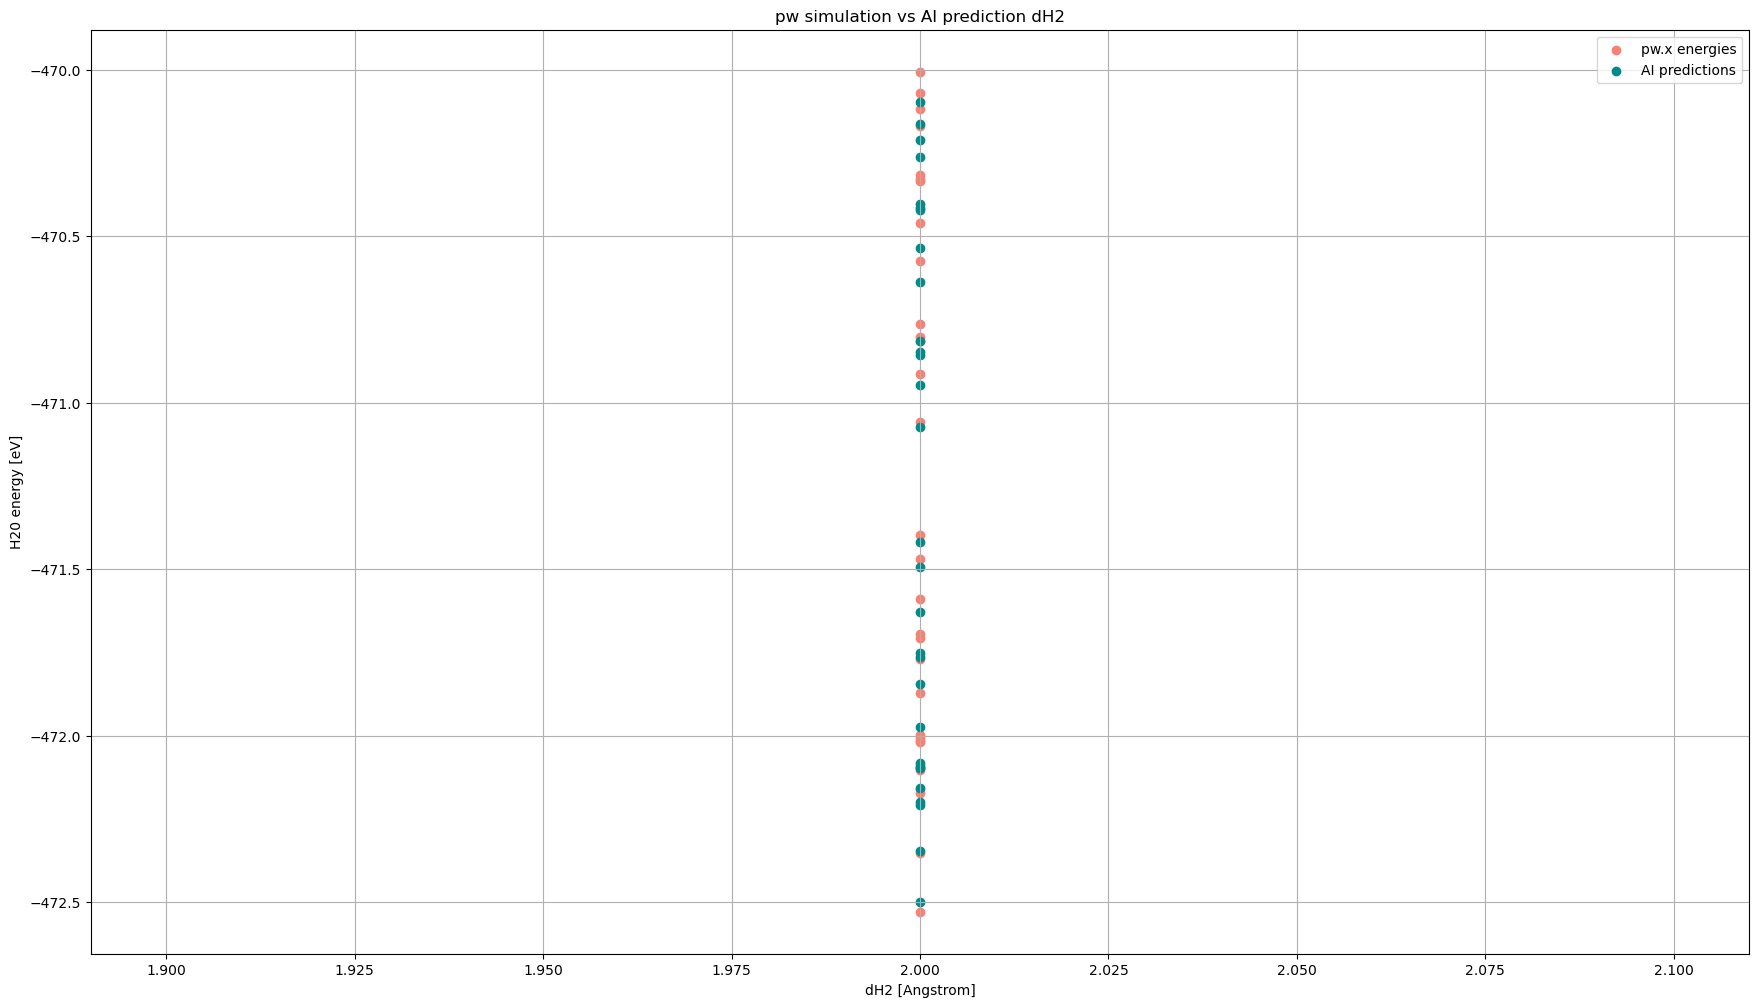

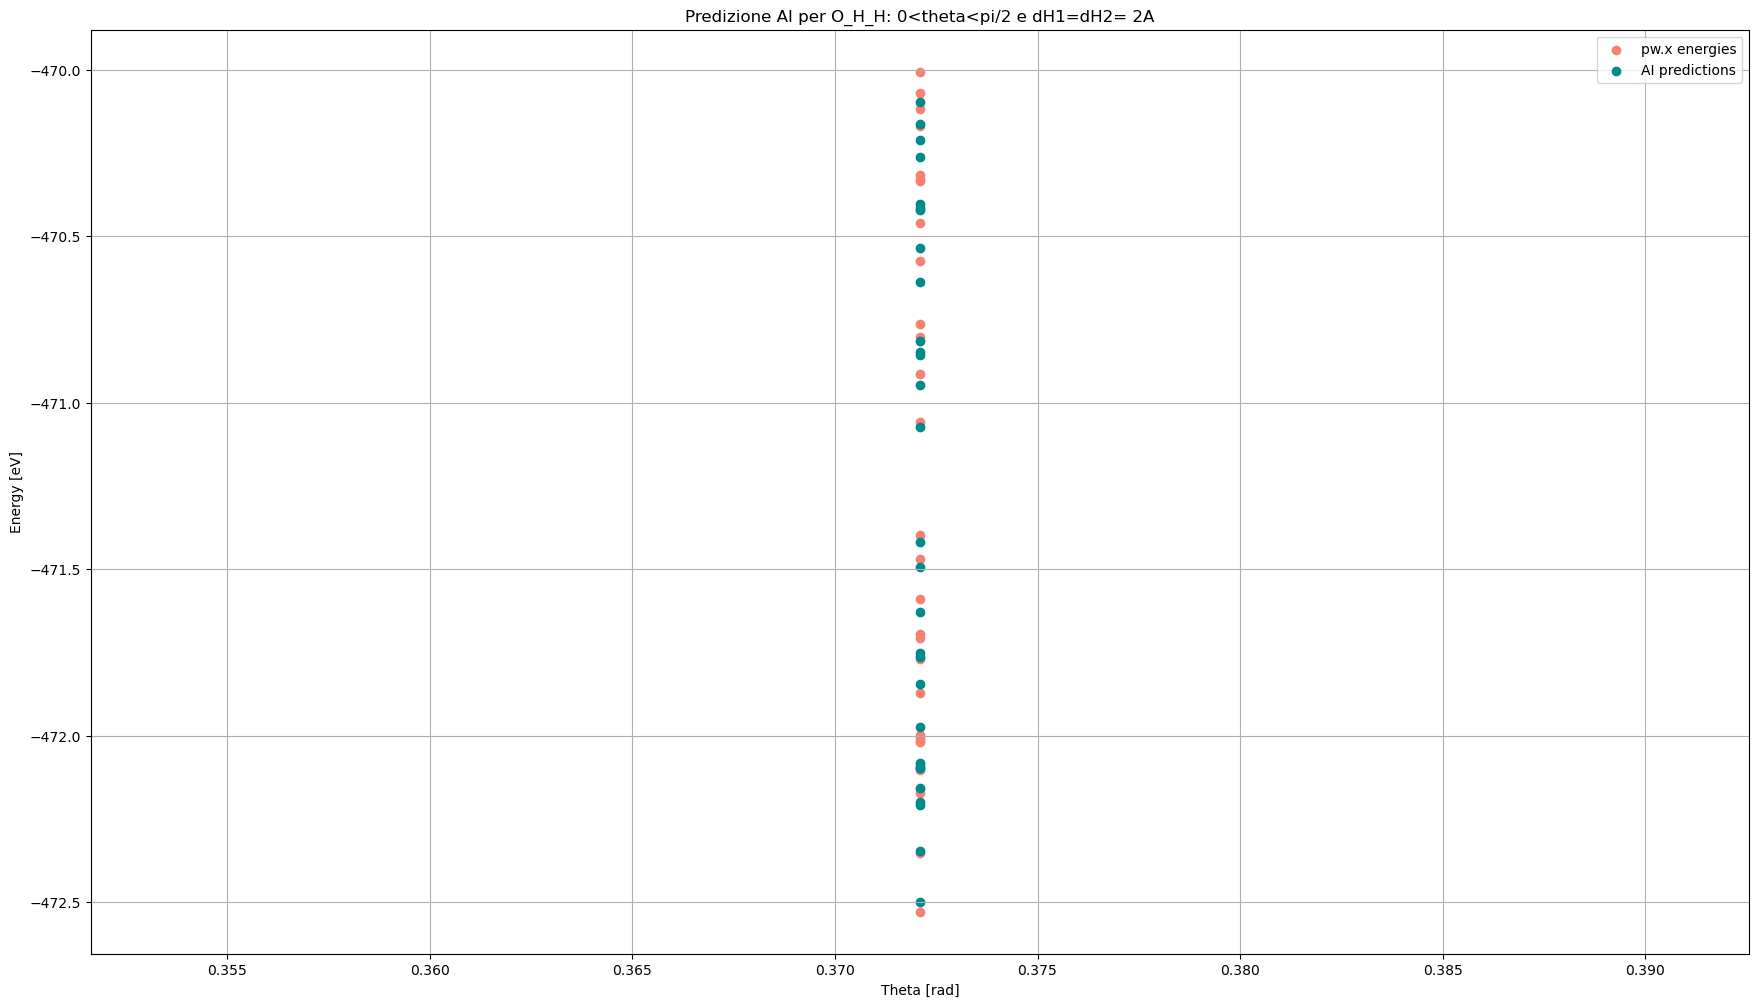

In [6]:
#saving graphs of predictions vs energies
fig1, ax1 = plt.subplots(figsize=(21.4,12))
ax1.set(title='Predizione AI per O_H_H: 0.5<dH1<3.5 A, theta=0.37 rad e dH2= 2A')
ax1.set(xlabel="dH1 [Angstrom]", ylabel="H20 energy [eV]")
ax1.scatter(d1, energies, color ='salmon', label='pw.x energies')
ax1.scatter(d1, predictions, color='darkcyan', label='AI predictions')
ax1.grid(axis='both')
ax1.legend(loc='best', ncol=1, facecolor= 'white')

fig2, ax2 = plt.subplots(figsize=(21.4,12))
ax2.set(title='pw simulation vs AI prediction dH2')
ax2.set(xlabel="dH2 [Angstrom]", ylabel="H20 energy [eV]")
ax2.scatter(d2, energies, color ='salmon', label='pw.x energies')
ax2.scatter(d2, predictions, color='darkcyan', label='AI predictions')
ax2.grid(axis='both')
ax2.legend(loc='best', ncol=1, facecolor= 'white')

fig3, ax3 = plt.subplots(figsize=(21.4,12))
ax3.set(title='Predizione AI per O_H_H: 0<theta<pi/2 e dH1=dH2= 2A')
ax3.set(xlabel="Theta [rad]", ylabel="Energy [eV]")
ax3.scatter(theta, energies, color ='salmon', label='pw.x energies')
ax3.scatter(theta, predictions, color='darkcyan', label='AI predictions')
ax3.grid(axis='both')
ax3.legend(loc='best', ncol=1, facecolor= 'white')


#Save graphs
#create directory to save graphs
save_dir = os.path.join(os.getcwd(), 'graphs')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

graph1_path = os.path.join(save_dir, graph1_name)
graph2_path = os.path.join(save_dir, graph2_name)
graph3_path = os.path.join(save_dir, graph3_name)

fig1.savefig(graph1_path, dpi = 200)
fig2.savefig(graph2_path, dpi = 200)
fig3.savefig(graph3_path, dpi = 200)

print('Saved graphs at %s ' % graph1_path , '\n')
print('Saved graphs at %s ' % graph2_path , '\n')
print('Saved graphs at %s ' % graph3_path , '\n')